In [126]:
# All the required packages
!pip install qiskit ipywidgets
from IPython.display import Audio
import numpy as np
import math
import cmath
!pip install ibm_quantum_widgets
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import *
from numpy.linalg import eig
from math import *
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
##Initializing the variables of the rbm
sg= np.ones(2)
a = np.ones(2)
b =  np.ones(2)
c=1
d = np.ones(2)
e=1
f=np.ones(2)
w = np.array([[1,1],[1,1]])
x = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
oldpx = [0,0,0,0]
newIt=1

 

In [128]:
# Hamiltonian Parameters
# length units - Angstrom
a1 = array([2.55*sqrt(3)/2,2.55/2])
a2 = array([2.55*sqrt(3)/2,-2.55/2])
#Energy units-eV
tc = 1.994
t1 = 2.86
t2 = -0.236
t3 = 0.252
U=9.3

In [129]:
#Hamiltonian
def H1(K):
    return t1*(1+cmath.exp(dot(K,a1)*1j)+cmath.exp(dot(K,a2)*1j))
def H2(K):
    return t2*(cmath.exp(dot(K,a1)*1j)+cmath.exp(dot(K,a2)*1j) + cmath.exp(dot(K,-a2)*1j)+
               cmath.exp(dot(K,-a1)*1j) +cmath.exp(dot(K,a2-a1)*1j) +cmath.exp(dot(K,a1-a2)*1j))
def H3(K):
    return t3*(cmath.exp(dot(K,a2-a1)*1j) +cmath.exp(dot(K,a1-a2)*1j) + cmath.exp(dot(K,a1+a2)*1j))
def H(K):
    return np.array([[tc + H2(K),0,0,H1(K)+H3(K)],[0,tc+H2(K)+U,H1(K)+H3(K),0],
                     [0,conj(H1(K))+conj(H3(K)),tc+H2(K)+U,0],[conj(H1(K))+conj(H3(K)),0,0,tc+H2(K)]])
 


In [130]:
#Hamiltonian as function of spins
def A(sg1,sg2):
 k = np.array(K)
 sg1=np.array(sg1)
 sg2=np.array(sg2)
 i=0
 j=0
 if (sg1==[1,1]).all():
    i=0
 elif (sg1==[1,-1]).all():
    i=1
 elif (sg1==[-1,1]).all():
    i=2
 elif (sg1==[-1,-1]).all():
    i=3
    
 if (sg2==[1,1]).all():
    j=0
 elif (sg2==[1,-1]).all():
    j=1
 elif (sg2==[-1,1]).all():
    j=2
 elif (sg2==[-1,-1]).all():
    j=3
 return H(k)[i,j]
#print(A([1,1],[1,1]))

In [131]:
#Quantum computer Code to get P(x)

def px(sg,a,b,c,d,e,f,w): 
  # Assigning qubit rotation angles using the above parameters
 global newIt
 global oldpx

 if newIt == 0:  #to minimize runs of quantum circuit if the parameters are the same
   if(sg == [1,1]).all():
    return oldpx[0] 

   if(sg == [-1,1]).all():
    return oldpx[1] 

   if(sg == [1,-1]).all():
    return oldpx[2] 

   if(sg == [-1,-1]).all():
    return oldpx[3] 
 
 theta =[0,0];
 gamma =[0,0];

 theta[0] = (2*cmath.asin(cmath.sqrt(cmath.exp(a[0])/(cmath.exp(a[0]) + cmath.exp(-a[0]))))).real;
 theta[1] = (2*cmath.asin(cmath.sqrt(cmath.exp(a[1])/(cmath.exp(a[1]) + cmath.exp(-a[1]))))).real;


 gamma[0] = (2*cmath.asin(cmath.sqrt(cmath.exp(b[0])/(cmath.exp(b[0]) + cmath.exp(-b[0]))))).real;
 gamma[1] = (2*cmath.asin(cmath.sqrt(cmath.exp(b[1])/(cmath.exp(b[1]) + cmath.exp(-b[1]))))).real;

 THETA = [(2*cmath.asin(cmath.sqrt(cmath.exp(w[0,0])/(cmath.exp(abs(w[0,0])))))).real,
          (2*cmath.asin(cmath.sqrt(cmath.exp(w[0,1])/(cmath.exp(abs(w[0,1])))))).real,
          (2*cmath.asin(cmath.sqrt(cmath.exp(w[1,0])/(cmath.exp(abs(w[1,0])))))).real,
          (2*cmath.asin(cmath.sqrt(cmath.exp(w[1,1])/(cmath.exp(abs(w[1,1])))))).real];

 THETAN = [(2*cmath.asin(cmath.sqrt(cmath.exp(-w[0,0])/(cmath.exp(abs(w[0,0])))))).real,
           (2*cmath.asin(cmath.sqrt(cmath.exp(-w[0,1])/(cmath.exp(abs(w[0,1])))))).real,
           (2*cmath.asin(cmath.sqrt(cmath.exp(-w[1,0])/(cmath.exp(abs(w[1,0])))))).real,
           (2*cmath.asin(cmath.sqrt(cmath.exp(-w[1,1])/(cmath.exp(abs(w[1,1])))))).real];

#initialising ccry gate 0
 qreg = QuantumRegister(3, 'q')
 ccry = QuantumCircuit(qreg)

 ccry.cry(THETA[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[0] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETAN[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[0] / 2, qreg[0], qreg[2])

 ccry.x(0)
 ccry.x(1)


 ccry.cry(THETAN[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[0] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETA[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[0] / 2, qreg[0], qreg[2])

 CCRY0 = ccry.to_instruction()

#initialising ccry gate 1
 qreg = QuantumRegister(3, 'q')
 ccry = QuantumCircuit(qreg)

 ccry.cry(THETA[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[1] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETAN[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[1] / 2, qreg[0], qreg[2])

 ccry.x(0)
 ccry.x(1)


 ccry.cry(THETAN[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[1] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETA[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[1] / 2, qreg[0], qreg[2])

 CCRY1 = ccry.to_instruction()

#initialising ccry gate 2
 qreg = QuantumRegister(3, 'q')
 ccry = QuantumCircuit(qreg)

 ccry.cry(THETA[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[2] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETAN[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[2] / 2, qreg[0], qreg[2])

 ccry.x(0)
 ccry.x(1)


 ccry.cry(THETAN[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[2] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETA[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[2] / 2, qreg[0], qreg[2])

 CCRY2 = ccry.to_instruction()

#initialising ccry gate 3
 qreg = QuantumRegister(3, 'q')
 ccry = QuantumCircuit(qreg)

 ccry.cry(THETA[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[3] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETAN[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[3] / 2, qreg[0], qreg[2])

 ccry.x(0)
 ccry.x(1)


 ccry.cry(THETAN[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[3] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETA[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[3] / 2, qreg[0], qreg[2])

 CCRY3 = ccry.to_instruction()

# The actual circuit(4 visible units + 4 hidden units)
 qreg_q = QuantumRegister(8, 'q')
 creg_c = ClassicalRegister(8, 'c')
 circuit = QuantumCircuit(qreg_q, creg_c)

 circuit.ry(theta[0], qreg_q[0])
 circuit.ry(theta[1], qreg_q[1])
 circuit.ry(gamma[0], qreg_q[2])
 circuit.ry(gamma[1], qreg_q[3])

# Circuit barrier

 circuit.barrier(qreg_q[0])
 circuit.barrier(qreg_q[1])
 circuit.barrier(qreg_q[2])
 circuit.barrier(qreg_q[3])
 circuit.barrier(qreg_q[4])
 circuit.barrier(qreg_q[5])
 circuit.barrier(qreg_q[6])
 circuit.barrier(qreg_q[7])

#Appending ccry gates (update it after talking to Manas

 circuit.append(CCRY0, [0,2,4]);
 circuit.append(CCRY1, [0,3,5]);
 circuit.append(CCRY2, [1,2,6]);
 circuit.append(CCRY3, [1,3,7]);

# Measurements
 circuit.measure(qreg_q[0], creg_c[0])
 circuit.measure(qreg_q[1], creg_c[1])
 circuit.measure(qreg_q[2], creg_c[2])
 circuit.measure(qreg_q[3], creg_c[3])
 circuit.measure(qreg_q[4], creg_c[4])
 circuit.measure(qreg_q[5], creg_c[5])
 circuit.measure(qreg_q[6], creg_c[6])
 circuit.measure(qreg_q[7], creg_c[7])


# Transpile for simulator
 simulator = Aer.get_backend('aer_simulator')
 circ = transpile(circuit, simulator)

# Run and get counts
 num_of_shots = 10000;  #Was originally 1000
 result = simulator.run(circ, shots=num_of_shots).result()
 counts = result.get_counts(circ)

 P = {'00':0,'01':0,'10':0,'11':0}

 for i in P:
    for j in counts:
        if (j[0:4] == '1111' and j[6:8] == i):
            P[i] = P[i] + counts[j]/num_of_shots;
 oldpx[0] =  P['00']
 oldpx[1] =  P['10']
 oldpx[2] =  P['01']
 oldpx[3] =  P['11']    
 newIt = 0
 if(sg == [1,1]).all():
    
    return P['00']

 if(sg == [-1,1]).all():
    return P['10']

 if(sg == [1,-1]).all():
    return P['01']

 if(sg == [-1,-1]).all():
    return P['11']


In [132]:
#defining gradient functions
def sx(sg,a,b,c,d,e,f,w):  ## S(x), i,j runs from 1 to 2
  term1= c+np.einsum('i,i->', d, sg) 
  term2 =(e+np.einsum('i,i', f, sg))*1j
  return cmath.tanh(term1+term2)
####

In [133]:
def Bxa(sg,a,b,c,d,e,f,w): #B(x;a_i)
  return 0.5*sg

In [134]:
def Bxb (sg,a,b,c,d,e,f,w):
  return 0.5*np.array(list(map(cmath.tanh, b+ np.einsum('ij,i->j', w, sg))))

def Bxc (sg,a,b,c,d,e,f,w):
  return (1/(( sx(sg,a,b,c,d,e,f,w)))- sx(sg,a,b,c,d,e,f,w))

def Bxd (sg,a,b,c,d,e,f,w):
  return  (1/( sx(sg,a,b,c,d,e,f,w))- sx(sg,a,b,c,d,e,f,w))*sg

def Bxe (sg,a,b,c,d,e,f,w):
  return (1/( sx(sg,a,b,c,d,e,f,w))- sx(sg,a,b,c,d,e,f,w))*1j

def Bxf (sg,a,b,c,d,e,f,w):
  return (1/( sx(sg,a,b,c,d,e,f,w))- sx(sg,a,b,c,d,e,f,w))*1j*sg

def Bxw (sg,a,b,c,d,e,f,w):
  term1 = 0.5*np.array(list(map(cmath.tanh, b+np.einsum('ij,i->j', w, sg))))
  term2 = sg
  return np.einsum('j,i->ij',term1,term2)

In [135]:
def Avx(Bxi,sg,a,b,c,d,e,f,w): #<B(x;p_k)>_x  
  denom=0+0*1j
  for i in range(x.shape[0]):
    denom+= abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))**2
####
  
  if Bxi == Bxc or Bxi == Bxe :
   numer=0+0*1j
   for i in range(x.shape[0]):
      t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
      t2= Bxi(x[i],a,b,c,d,e,f,w)
      t3= cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w)
      numer+=t1*t2*t3
   return (numer)/(denom.real)
  elif Bxi == Bxw:
     numer2=np.zeros((w.shape[0],w.shape[0]),dtype = 'complex_')
     for l in range(a.shape[0]): 
       for k in range(a.shape[0]):
         numerkl=0 +0*1j ### review
         for i in range(x.shape[0]):
            t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
            t2= Bxi(x[i],a,b,c,d,e,f,w)[k][l]
            t3= cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w)
            numerkl+=t1*t2*t3
         numer2[k][l]=numerkl
     return (numer2)/(denom.real)
  else:
     numer3=np.zeros(a.shape[0],dtype = 'complex_')
     for k in range(a.shape[0]):
       numerk=0+0*1j
       for i in range(x.shape[0]):
         t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
         t2= Bxi(x[i],a,b,c,d,e,f,w)[k]
         t3= cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w)
         numerk+=t1*t2*t3
       numer3[k]=numerk
     return (numer3)/(denom.real) 

In [136]:
def Avxx(Bxi,sg,a,b,c,d,e,f,w): #_x',x  #Done
  denom=0
  for i in range(x.shape[0]):
    denom+= abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*(sx(x[i],a,b,c,d,e,f,w)))**2
####
  
  if Bxi == Bxc or Bxi == Bxe :
   numer=0+0*1j
   for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
      t2= A(x[i],x[j])*Bxi(x[j],a,b,c,d,e,f,w)
      t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
      numer+=t1*t2*t3
   return (numer)/(denom.real)
  elif Bxi == Bxw:
     numer=np.zeros((w.shape[0],w.shape[0]),dtype = 'complex_')
     for k in range(a.shape[0]):
       for l in range(a.shape[0]):
         numerkl=0+0*1j
         for i in range(x.shape[0]):
           for j in range(x.shape[0]):
            t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
            t2= A(x[i],x[j])*Bxi(x[j],a,b,c,d,e,f,w)[k][l]
            t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
            numerkl+=t1*t2*t3
         numer[k][l]=numerkl

     
     return (numer)/(denom.real)
  else:
     numer=np.zeros(a.shape[0],dtype = 'complex_')
     for k in range(a.shape[0]):
       numerk=0+0*1j
       for i in range(x.shape[0]):
         for j in range(x.shape[0]):
          t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
          t2= A(x[i],x[j])*Bxi(x[j],a,b,c,d,e,f,w)[k]
          t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
          numerk+=t1*t2*t3
       numer[k]=numerk
     return (numer)/(denom.real)    


In [137]:
def AvA (sg,a,b,c,d,e,f,w):  # doesn't depend on sg actually #Done
  numer=0+0*1j

  for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
      t2= A(x[i],x[j])
      t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
      numer+=t1*t2*t3
  denom=0+0*1j
  for i in range(x.shape[0]):
    denom+= abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*((sx(x[i],a,b,c,d,e,f,w))))**2
  return (numer.real)/(denom.real)

def AvAp (params):

  a  =  np.array(params[0:2])
  b  =  np.array(params[2:4])
  c  =  np.array(params[4])
  d  =  np.array(params[5:7])
  e  =  np.array(params[7])
  f  =  np.array(params[8:10])
  w  =  np.array(np.resize(params[10:14],(2,2)))
  numer=0+0*1j
  for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      
      t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
      t2= A(x[i],x[j])
      t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
      numer+=t1*t2*t3
  denom=0+0*1j
  for i in range(x.shape[0]):
     denom+= abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*((sx(x[i],a,b,c,d,e,f,w))))**2
  result = (numer.real)/(denom.real)
  if np.isfinite(result):
    return result
  else:
    return 0.1 #Review
  return result.real

In [138]:

def PlaySound(): #to play a customizable notification sound when the algorithm ends 
 
  Audio(url="http://www.nch.com.au/acm/8k16bitpcm.wav")
  max_time = 5
  f1 = 293.5
  f2 = 196.5
  rate = 10000
  L = 5
  times = np.linspace(0,L,rate*L)
  signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
  return Audio(data=signal, rate=rate,autoplay=True)
  
 

In [139]:
def partialAx(Bxi,sg,a,b,c,d,e,f,w): #partial/partial x_k
  term1 = Avxx(Bxi,sg,a,b,c,d,e,f,w) 
  if Bxi == Bxc or Bxi == Bxe:
    term2 = term1+np.conjugate(term1)
  else:
    term2 = term1 + np.array(list(map(np.conj, term1)))
  term3 = Avx(Bxi,sg,a,b,c,d,e,f,w) 
  if Bxi == Bxc or Bxi == Bxe:
    term4 = AvA(sg,a,b,c,d,e,f,w)*(term3+ np.conjugate(term3))
  else:
    term4 = AvA(sg,a,b,c,d,e,f,w)*(term3+ np.array(list(map(np.conj, term3)))) 
  return (term2+term4)



In [140]:
##Checking the wave function shape
def getPhi(params):
  a  =  np.array(params[0:2])
  b  =  np.array(params[2:4])
  c  =  np.array(params[4])
  d  =  np.array(params[5:7])
  e  =  np.array(params[7])
  f  =  np.array(params[8:10])
  w  =  np.array(np.resize(params[10:14],(2,2)))
  norm=0
  norm2=0
  global newIt
  phi=np.zeros(4,dtype = 'complex_')
  for i in range(x.shape[0]):
    newIt=1
    phi[i]=(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
    norm+=abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))**2
  phi=phi/math.sqrt(norm)
  for i in range(phi.shape[0]):
    norm2+=abs(phi[i])**2
  if abs(norm2-1)>0.1:
    return -1
  else:
    return phi


In [141]:
def grad(params): # vectorial gradient
  global newIt
  a  =  np.array(params[0:2])
  b  =  np.array(params[2:4])
  c  =  np.array(params[4])
  d  =  np.array(params[5:7])
  e  =  np.array(params[7])
  f  =  np.array(params[8:10])
  w  =  np.array(np.resize(params[10:14],(2,2))) #
  newIt = 1
  term1=np.append(np.concatenate((partialAx(Bxa,sg,a,b,c,d,e,f,w),partialAx(Bxb,sg,a,b,c,d,e,f,w))),partialAx(Bxc,sg,a,b,c,d,e,f,w)) 
  term2 = np.append(term1,partialAx(Bxd,sg,a,b,c,d,e,f,w))
  term3= np.append(term2,partialAx(Bxe,sg,a,b,c,d,e,f,w))
  term4 = np.append(term3,partialAx(Bxf,sg,a,b,c,d,e,f,w))
  paramsgrad = np.append(term4,partialAx(Bxw,sg,a,b,c,d,e,f,w))
 
  return paramsgrad


In [142]:
def gd(grad, sg,a,b,c,d,e,f,w, n_epochs=50, eta=0.01):  #Gradient descent
    #We can here use Adam instead of this very simple descent
    
    term1=np.append(np.concatenate((a,b)),c) 
    term2 = np.append(term1,d)
    term3=np.append(term2,e)
    term4 = np.append(term3,f)
    params = np.append(term4,w)
    params = np.array([ 2.5858868  , 0.29387917, -2.17654852 ,-0.85961222  ,1.     ,    -2.87030439,
 -0.51901755 ,-3.19797632 ,-2.06971436 ,-1.55002126 , 3.79530196, -0.79293708,
 -2.01434318 , 1.35791069] )
    param_traj=np.zeros([n_epochs+1,params.shape[0]],dtype = 'complex_')
    param_traj[0,]=params
    v=0;
   
    for j in range(n_epochs):
         v=eta*(np.array(grad(params)))
         params=params-v
         param_traj[j+1]=params
    return  params,param_traj

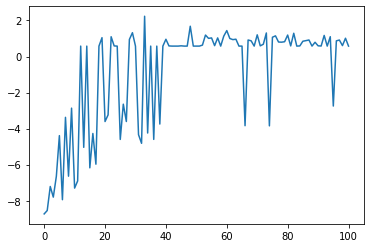

[ 2.11060998+0.j  0.2754587 +0.j -3.84522998+0.j -1.92132808+0.j
  1.10298911+0.j -2.76750448+0.j -0.65753595+0.j -3.10303522+0.j
 -1.97624368+0.j -1.73491386+0.j  4.09577181+0.j  0.13579261+0.j
 -1.09093994+0.j  1.75448123+0.j]


In [143]:
K = [0,0] 
import warnings
import matplotlib.pyplot as plt



warnings.simplefilter('ignore')
N=100

GD= gd(grad, sg,a,b,c,d,e,f,w, n_epochs=N, eta=0.01)
En = np.zeros(GD[1].shape[0])
for i in range(N+1):
  newIt=1
  En[i]=AvAp(GD[1][i])

t = np.arange(0,N+1, 1)
 
plt.plot(t, En)
plt.show()
print(GD[0])
warnings.simplefilter('once')


In [144]:
print(GD[1][np.argmin(En)].real)
print(En[np.argmin(En)])
print(getPhi(GD[1][np.argmin(En)].real))


[ 2.5858868   0.29387917 -2.17654852 -0.85961222  1.         -2.87030439
 -0.51901755 -3.19797632 -2.06971436 -1.55002126  3.79530196 -0.79293708
 -2.01434318  1.35791069]
-8.734714692508708
[-0.74853669-0.01103592j -0.16721945-0.0205748j   0.        +0.j
  0.64123735+0.00014752j]


In [145]:
# Adam

def objective(x):
  global newIt
  newIt=1
 
  return AvAp(x)
 
 
# derivative of objective function
def derivative(params):
	return grad(params) ###RRR
 
# gradient descent algorithm with adam
def adam(objective, derivative,params, bounds, n_iter, alpha, beta1, beta2, eps=1e-8): 

	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	params = np.array(params)
	paramtraj=np.zeros((n_iter+1,params.shape[0]),dtype = 'complex_')
	paramtraj[0]=params
	# run the gradient descent updates
	scores = np.zeros(n_iter+1)  ## sometimes a bug of indentaion happens its solution is to select the space and press tab!
	global newIt
	scores[0] = objective(params)  ####RRR
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(params)  # made new iteration in px
		# build a solution one variable at a time
		for i in range(params.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]  #
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			# mhat(t) = m(t) / (1 - beta1(t))
			mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
			params[i] = (params[i].real - alpha * mhat / (cmath.sqrt(vhat) + eps)).real
    
	  
		# evaluate candidate point
		scores[t+1] = objective(params)  ######3RRRR
		paramtraj[t+1]=params
		# report progress
		#print('>%d f(%s) = %.5f' % (t, x, score))
	return paramtraj, scores
 



In [146]:
#Defining parameters for Adam search
  
params = np.array(  [ 2.5858868 , 0.29387917, -2.17654852 ,-0.85961222 ,1. , -2.87030439, 
                     -0.51901755 ,-3.19797632 ,-2.06971436 ,-1.55002126 , 3.79530196, 
                     -0.79293708, -2.01434318 , 1.35791069]  )
  # define range for input
r=5
l=-5
bounds = np.array([[l, r],[l, r],[l, r],[l, r],[l, r]
                   ,[l, r],[l, r],[l, r],[l, r],[l, r]
									 ,[l, r],[l, r],[l, r],[l, r]])
# define the total iterations
n_iter = 500
# steps size
eta = 0.001
# factor for average gradient
beta1 = 0.999
# factor for average squared gradient
beta2 = 0.9
# perform the gradient descent search with adam multiple times one for each K
K =  [0.0 , 0.0]
GD = adam(objective, derivative, params, bounds,n_iter , eta, beta1, beta2)
 
print(GD[0][np.argmin(GD[1])],GD[1][np.argmin(GD[1])],K)

print('Done!')
PlaySound()



[ 2.69652311+0.j  0.40611549+0.j -2.3576322 +0.j -1.03960966+0.j
  0.74078229+0.j -3.14878831+0.j -0.81858667+0.j -3.53723046+0.j
 -2.39946148+0.j -1.85183687+0.j  3.96260311+0.j -0.62882657+0.j
 -1.84749444+0.j  1.52238517+0.j] -8.757953472773204 [0.0, 0.0]
Done!


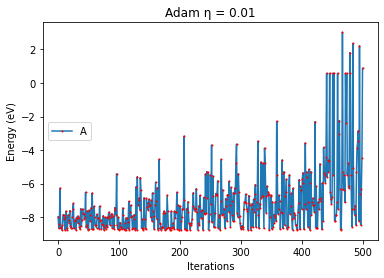

In [147]:
#Evaluating the algorithm path
plt.plot(GD[1],  marker = 'o', ms = 1, mec = 'r')
plt.legend(("Adam"),loc='center left')

plt.title("Adam η = 0.01")
plt.xlabel("Iterations")
plt.ylabel("Energy (eV)")
plt.show()
warnings.simplefilter('ignore')
#Energy=0
#for i in range(10):
# newIt= 1
# Energy+=AvAp(GD[0][np.argmin(GD[1])]).real
#print(Energy/10)
warnings.simplefilter('once')

In [148]:
#SPSA Test (Was not used to obtain results)
from qiskit.algorithms.optimizers import SPSA
K=  [0.41066571 , 0.23709796]
params =   [-2.09028517, -1.48080836 ,-2.53439822 ,-1.00556094 , 0.   ,      -2.13535432,
  0.89262366 ,-1.20596602 , 1.35629944 , 2.00023851 ,-1.9703351  , 2.73190159,
  1.33488444, -1.67908573] 
def objective(x):
  global newIt
  newIt=1
  if np.isfinite(AvAp(x)):
    return AvAp(x)
  else:
    return -0.02 # Review
def derivative(params):
	return grad(params).real

spsa = SPSA(maxiter=100, blocking=True,learning_rate=0.01,perturbation = 0.005)
parameters, value, niter = spsa.optimize(14, objective,derivative,bounds, initial_point=params)
print(parameters)
print(value)
print(f'SPSA completed after {niter} iterations',K)
PlaySound()


<ipython-input-148-43773717ab47>:18: DeprecationWarning: The SPSA.optimize method is deprecated as of Qiskit Terra 0.21.0 and will be removed no sooner than 3 months after the release date. Instead, use SPSA.minimize as a replacement, which supports the same arguments but follows the interface of scipy.optimize and returns a complete result object containing additional information.
  parameters, value, niter = spsa.optimize(14, objective,derivative,bounds, initial_point=params)
<ipython-input-137-34fa00333257>:35: RuntimeWarning: invalid value encountered in double_scalars
  result = (numer.real)/(denom.real)


[-1.58050142 -1.99059211 -3.32574726 -1.51534469  0.79134904 -1.34400528
  0.38283991 -0.96799599  1.11832941  1.76226848 -2.01393036  1.94055255
  1.29128918 -1.63549047]
-2.1212089973740027
SPSA completed after 301 iterations [0.41066571, 0.23709796]


In [149]:
#AMSGRAD Optimizer (Was not used to obtain results)
K = [0.41066571 , 0.23709796]
print(K)
params = [-2.09028517, -1.48080836 ,-2.53439822 ,-1.00556094 , 0.   ,      -2.13535432,
  0.89262366 ,-1.20596602 , 1.35629944 , 2.00023851 ,-1.9703351  , 2.73190159,
  1.33488444, -1.67908573] 
from qiskit.algorithms.optimizers import ADAM
ams = ADAM(maxiter=300, tol=1e-06, lr=0.01, beta_1=0.9, beta_2=0.99, noise_factor=0, eps=1e-10, amsgrad=True, snapshot_dir=None)
result = ams.minimize(fun=objective,jac=derivative,bounds=bounds, x0=params)
print(result)
PlaySound()

[0.41066571, 0.23709796]
{   'fun': -0.3275035806779129,
    'jac': None,
    'nfev': 300,
    'nit': None,
    'njev': None,
    'x': array([-1.51093425, -0.58330095, -3.26013424, -1.15131946, -0.15494509,
       -1.67804934,  1.35001689, -1.49925657,  1.20744529,  1.852451  ,
       -2.52089348,  3.51825176,  0.13681595, -0.76755971])}


In [150]:
#Random search for good initial conditions (was useful sometimes especially for first point K = [0,0])
 
K = [0,0]

k=3
l=3
min=10
for i in range(100):
  sg= np.ones(2)

  a = np.array([ random.random()*2*k-l,random.random()*2*k-l])
  b =  np.array( [random.random()*2*k-l,random.random()*2*k-l])
  c=random.randint(-2,2)
  d = np.array([ random.random()*2*k-l,random.random()*2*k-l])
  e=random.random()*2*k-l
  f= [random.random()*2*k-l,random.random()*2*k-l]
  w = np.array([[random.random()*2*k-l,random.random()*2*k-l],[ random.random()*2*k-l,random.random()*2*k-l]])
  newIt=1
  #print(AvA(sg,a,b,c,d,e,f,w))
  
  if AvA(sg,a,b,c,d,e,f,w)<min:
    min = AvA(sg,a,b,c,d,e,f,w)
    term1=np.append(np.concatenate((a,b)),c) 
    term2 = np.append(term1,d)
    term3=np.append(term2,e)
    term4 = np.append(term3,f)
    opt = np.append(term4,w)
  if min < -5:
    break
print("    ")
PlaySound()
print(opt,min,K)

    
[ 1.52215284  0.53341632  0.1275333  -2.56109306 -2.          1.43034053
  2.56390192  2.69771078 -1.96255234  1.30999778 -2.099287   -2.14535238
  2.9233421   2.47637757] -6.055079249203948 [0, 0]
